In [4]:
import numpy as np
import pandas as pd  # for data analytics

# The two packages below are for plotting
import seaborn as sns  #seaborn has nice features. Need to load pyplot with seaborn at the same time
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('national_accidents_attributes_adjusted.csv')

In [29]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)
df.head()

,Severity,Start_Time,City,State,Weather_Timestamp,Temp_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Street,Cross_street,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour,Severity_simple
0,3,2016-02-08 00:37:08,Dublin,OH,2016-02-08 00:53:00,42.1,58.0,29.76,10.0,SW,10.4,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,OUTERBELT E,SAWMILL RD,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,2,2016-02-08 05:56:20,Dayton,OH,2016-02-08 05:58:00,36.9,91.0,29.68,10.0,CALM,7.0,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-70 E,OH-4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,2016-02-08 06:15:39,Cincinnati,OH,2016-02-08 05:53:00,36.0,97.0,29.70,10.0,CALM,7.0,0.02,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,I-75 S,I-71,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2,2016-02-08 06:51:45,Akron,OH,2016-02-08 06:54:00,39.0,55.0,29.65,10.0,CALM,7.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-77 N,DART AVE,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3,2016-02-08 07:53:43,Cincinnati,OH,2016-02-08 07:53:00,37.0,93.0,29.69,10.0,WSW,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,I-75 S,MITCHELL AVE,0,1,0,0,0,0,0,0,0,0,0,1,1,1


In [6]:
df.describe()

,Severity,Temp_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Speed_mph,Precipitation_in,CLOUDY,RAIN,FOG,...,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour,Severity_simple
count,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,...,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06
mean,2.222448e+00,6.237918e+01,6.308089e+01,2.955843e+01,9.151159e+00,7.784320e+00,6.405431e-03,4.300181e-01,1.000210e-01,2.837018e-02,...,1.342003e-02,1.827625e-02,2.501538e-03,1.527592e-04,5.907816e-06,1.265961e-05,9.431238e-02,9.056876e-01,1.054959e-01,1.727977e-01
std,5.752754e-01,1.832461e+01,2.293234e+01,1.018704e+00,2.932016e+00,5.185903e+00,1.014427e-01,4.950785e-01,3.850142e-01,1.660281e-01,...,1.150649e-01,1.339487e-01,6.531417e-02,1.235864e-02,2.430594e-03,3.558013e-03,2.922629e-01,2.922629e-01,3.071914e-01,3.780725e-01
min,1.000000e+00,-2.790000e+01,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,5.100000e+01,4.700000e+01,2.947000e+01,1.000000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,6.400000e+01,6.500000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,7.600000e+01,8.200000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+00,1.184000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.698876e+02,2.400000e+01,1.000000e+00,3.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [30]:
df.Severity_simple.value_counts()

0    980128
1    204743
Name: Severity_simple, dtype: int64

### One hot encoding for 'Wind_Direction' and 'Sunrise_Sunset'

In [31]:
catvar = ['Wind_Direction','Sunrise_Sunset']
# One-hot encoding for catvar
X_cat = df[catvar]

from sklearn.preprocessing import OneHotEncoder
my_encoder = OneHotEncoder(handle_unknown = 'ignore',sparse = False)
X_encoded = my_encoder.fit_transform(X_cat)
X_encoded_cols = (list(my_encoder.categories_[0])+
                 list(my_encoder.categories_[1]))
print(X_encoded_cols)

['CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW', 'Day', 'Night']


In [32]:
X_encoded_df = pd.DataFrame(data = X_encoded, columns = X_encoded_cols)

In [33]:
X_encoded_df.head()

,CALM,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW,Day,Night
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [47]:
# Add encoded X_cat into df
df2 = pd.concat([df, X_encoded_df], axis  = 1)

### Cubic root transformation of all numerical variables (skewed but has negative values)

In [48]:
num_var = ['Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in']
for col in num_var:
    df2[col+'_cubic_root'] = np.cbrt(df2[col])

In [37]:
df2.isnull().sum()

Severity                       0
Start_Time                     0
City                           0
State                          0
Weather_Timestamp              0
Temp_F                         0
Humidity_percent               0
Pressure_in                    0
Visibility_mi                  0
Wind_Direction                 0
Wind_Speed_mph                 0
Precipitation_in               0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Loop                   0
Sunrise_Sunset                 0
Street                         0
Cross_street                   0
CLOUDY                         0
RAIN                           0
FOG       

### Data column suggestions

In [49]:
df2 = df2.drop(columns = ['Severity','Start_Time','Weather_Timestamp','Wind_Direction','Sunrise_Sunset']) #Removing cols

In [51]:
#All df2 columns
col = list(df2.columns)
print(col)

['City', 'State', 'Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Street', 'Cross_street', 'CLOUDY', 'RAIN', 'FOG', 'THUNDER', 'WINDY', 'SNOW', 'SLEET', 'DUST', 'TORNADO', 'HAIL', 'Non_workday', 'Work_day', 'Rush_hour', 'Severity_simple', 'CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW', 'Day', 'Night', 'Temp_F_cubic_root', 'Humidity_percent_cubic_root', 'Pressure_in_cubic_root', 'Visibility_mi_cubic_root', 'Wind_Speed_mph_cubic_root', 'Precipitation_in_cubic_root']


In [52]:
X_location = ['City','State','Street','Cross_street']  #Columns with location info

#Wind direction binary, may not be relevant
X_wind_direction = ['CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S',
                    'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW']   

#Columns that are 100% correlated with another column in the dataset
#'Non_workday' and 'Workday'; 'Day' and 'Night', so only 'Workday' and 'Night' is kept
X_multicollinear = ['Non_workday','Day']

#Columns with cubic root transformation
X_cubic_transformed = ['Temp_F_cubic_root', 'Humidity_percent_cubic_root', 'Pressure_in_cubic_root',
                       'Visibility_mi_cubic_root', 'Wind_Speed_mph_cubic_root', 'Precipitation_in_cubic_root']

#Columns without transformation
X_num = ['Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in']

### Attributes that could be used in modeling, without transformation

In [53]:
X_no_trans = [i for i in col if (i != 'Severity_simple' and
                                 i not in X_location and
                                 i not in X_multicollinear and
                                 i not in X_cubic_transformed)]
print(X_no_trans)

['Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'CLOUDY', 'RAIN', 'FOG', 'THUNDER', 'WINDY', 'SNOW', 'SLEET', 'DUST', 'TORNADO', 'HAIL', 'Work_day', 'Rush_hour', 'CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW', 'Night']


### Attributes that could be used in modeling, with cubic root transformation

In [54]:
X_trans = [i for i in col if (i != 'Severity_simple' and
                              i not in X_location and
                              i not in X_multicollinear and
                              i not in X_num)]
print(X_trans)

['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'CLOUDY', 'RAIN', 'FOG', 'THUNDER', 'WINDY', 'SNOW', 'SLEET', 'DUST', 'TORNADO', 'HAIL', 'Work_day', 'Rush_hour', 'CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW', 'Night', 'Temp_F_cubic_root', 'Humidity_percent_cubic_root', 'Pressure_in_cubic_root', 'Visibility_mi_cubic_root', 'Wind_Speed_mph_cubic_root', 'Precipitation_in_cubic_root']


### Implementing Naïve Bayes

In [55]:
df2.head() #dataFrame 2 contains continuous variables

,City,State,Temp_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Speed_mph,Precipitation_in,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Street,Cross_street,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour,Severity_simple,CALM,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW,Day,Night,Temp_F_cubic_root,Humidity_percent_cubic_root,Pressure_in_cubic_root,Visibility_mi_cubic_root,Wind_Speed_mph_cubic_root,Precipitation_in_cubic_root
0,Dublin,OH,42.1,58.0,29.76,10.0,10.4,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,OUTERBELT E,SAWMILL RD,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.478783,3.870877,3.098924,2.154435,2.182786,0.000000
1,Dayton,OH,36.9,91.0,29.68,10.0,7.0,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,I-70 E,OH-4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.329217,4.497941,3.096145,2.154435,1.912931,0.271442
2,Cincinnati,OH,36.0,97.0,29.70,10.0,7.0,0.02,False,False,False,False,True,False,False,False,False,False,False,False,False,I-75 S,I-71,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.301927,4.594701,3.096840,2.154435,1.912931,0.271442
3,Akron,OH,39.0,55.0,29.65,10.0,7.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,I-77 N,DART AVE,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.391211,3.802952,3.095102,2.154435,1.912931,0.000000
4,Cincinnati,OH,37.0,93.0,29.69,10.0,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,I-75 S,MITCHELL AVE,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.332222,4.530655,3.096493,2.154435,2.182786,0.215443


In [56]:
y_nt = df2['Severity_simple']
X_nt = df2[X_no_trans]

In [57]:
X_nt_train, X_nt_test, y_nt_train, y_nt_test = train_test_split(X_nt, y_nt, test_size = 0.3, random_state = 42)

In [58]:
# Training the Model
from sklearn.naive_bayes import GaussianNB

g_nb = GaussianNB()
g_nb.fit(X_nt_train, y_nt_train)

GaussianNB()

In [62]:
y_nt_test_pred= g_nb.predict(X_nt_test)

### Displaying Performance Metrics

In [64]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

my_matrix_nt = confusion_matrix(y_nt_test, y_nt_test_pred)
print("TP in Not-Transformed Matrix is:", my_matrix_nt[1, 1])
print("TN in Not-Transformed Matrix is is:", my_matrix_nt[0, 0])
print("FP in Not-Transformed Matrix is is:", my_matrix_nt[0, 1])
print("FN in Not-Transformed Matrix is is:", my_matrix_nt[1, 0])

TP in Not-Transformed Matrix is: 18911
TN in Not-Transformed Matrix is is: 229055
FP in Not-Transformed Matrix is is: 65046
FN in Not-Transformed Matrix is is: 42450


In [65]:
# Additional Performance Metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Precision score in Not-Transformed Matrix is:', precision_score(y_nt_test, y_nt_test_pred))
print('Recall score in Not-Transformed Matrix is:', recall_score(y_nt_test, y_nt_test_pred))
print('Accuracy score in Not-Transformed Matrix is:', accuracy_score(y_nt_test, y_nt_test_pred))
print('F1 score in Not-Transformed Matrix is:', f1_score(y_nt_test, y_nt_test_pred))

Precision score in Not-Transformed Matrix is: 0.22524625701251832
Recall score in Not-Transformed Matrix is: 0.3081925001222275
Accuracy score in Not-Transformed Matrix is: 0.6975879278235085
F1 score in Not-Transformed Matrix is: 0.2602705790060419


### Visualization for Precision-Recall Curve and  ROC Curve

Text(0, 0.5, 'precision')

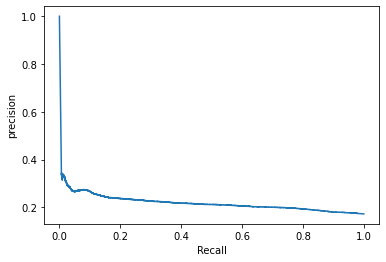

In [70]:
from sklearn.metrics import precision_recall_curve

# S1. Get probability
my_prob = g_nb.predict_proba(X_nt_test)[:, 1] #column index 1, because it has prob=1

# S2. Collect Necessary Measures
precision, recall, threshold = precision_recall_curve(y_nt_test,my_prob) # 3 outputs

# S3. Plot Figure
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('precision')

#Since Recall and Precicion are too low values, does not seem that its Curve is useful, its giving us the opposite direction

Text(0, 0.5, 'TPR')

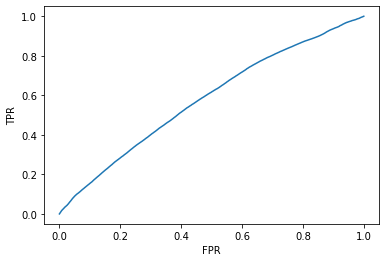

In [68]:
from sklearn.metrics import roc_curve

# Predicted Probability: y_pred_proba
fpr,tpr,threshold= roc_curve(y_nt_test,my_prob)

# Generate Figure
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


In [69]:
from sklearn.metrics import roc_auc_score

print("AUC for Gaussian NB:", roc_auc_score(y_nt_test,my_prob)   ) #AUC should be close to 1

AUC for Gaussian NB: 0.5809964310840051


### Sampling Data - more balance sets of data for predicting the Severity of a car accident

In [82]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

oversample = RandomOverSampler(random_state = 0)
undersample = RandomUnderSampler(random_state = 0)

In [83]:
y_t = df2['Severity_simple']
X_t = df2[X_trans]

In [84]:
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X_t, y_t, test_size = 0.3, random_state = 42)

In [85]:
# Over-Sampling Method
X_t_over, y_t_over = oversample.fit_resample(X_t_train, y_t_train)
print(Counter(y_t_over))

Counter({0: 686027, 1: 686027})


In [93]:
g_nb_over = GaussianNB()
g_nb_over.fit(X_t_over, y_t_over) # Training Model, using Oversampled dataset
y_over_test_pred= g_nb_over.predict(X_t_test)

In [94]:
my_matrix_t_over = confusion_matrix(y_t_test, y_over_test_pred)
print("TP in Transformed Matrix (oversampled) is:", my_matrix_t_over[1, 1])
print("TN in Transformed Matrix (oversampled) is:", my_matrix_t_over[0, 0])
print("FP in Transformed Matrix (oversampled) is :", my_matrix_t_over[0, 1])
print("FN in Transformed Matrix (oversampled) is :", my_matrix_t_over[1, 0])

print('Precision score Transformed Matrix (oversampled) is:', precision_score(y_t_test, y_over_test_pred))
print('Recall score in Transformed Matrix (oversampled) is:', recall_score(y_t_test, y_over_test_pred))
print('Accuracy score Transformed Matrix (oversampled) is:', accuracy_score(y_t_test, y_over_test_pred))
print('F1 score in Transformed Matrix (oversampled) is:', f1_score(y_t_test, y_over_test_pred))

TP in Transformed Matrix (oversampled) is: 43905
TN in Transformed Matrix (oversampled) is: 124718
FP in Transformed Matrix (oversampled) is : 169383
FN in Transformed Matrix (oversampled) is : 17456
Precision score Transformed Matrix (oversampled) is: 0.20584843029143693
Recall score in Transformed Matrix (oversampled) is: 0.7155196297322404
Accuracy score Transformed Matrix (oversampled) is: 0.4743770079502169
F1 score in Transformed Matrix (oversampled) is: 0.31971716627404434


In [86]:
# Under-Sampling Method
X_t_under, y_t_under = undersample.fit_resample(X_t_train, y_t_train)
print(Counter(y_t_under))

Counter({0: 143382, 1: 143382})


In [95]:
g_nb_under = GaussianNB()
g_nb_under.fit(X_t_under, y_t_under) # Training Model, using Under-sampled dataset
y_under_test_pred= g_nb_under.predict(X_t_test)

In [99]:
my_matrix_t_under = confusion_matrix(y_t_test, y_under_test_pred)
print("TP in Transformed Matrix (undersampled) is:", my_matrix_t_under[1, 1])
print("TN in Transformed Matrix (undersampled) is:", my_matrix_t_under[0, 0])
print("FP in Transformed Matrix (undersampled) is :", my_matrix_t_under[0, 1])
print("FN in Transformed Matrix (undersampled) is :", my_matrix_t_under[1, 0])

print('Precision score Transformed Matrix (undersampled) is:', precision_score(y_t_test, y_under_test_pred))
print('Recall score in Transformed Matrix (undersampled) is:', recall_score(y_t_test, y_under_test_pred))
print('Accuracy score Transformed Matrix (undersampled) is:', accuracy_score(y_t_test, y_under_test_pred))
print('F1 score in Transformed Matrix (undersampled) is:', f1_score(y_t_test, y_under_test_pred))

TP in Transformed Matrix (undersampled) is: 49552
TN in Transformed Matrix (undersampled) is: 94068
FP in Transformed Matrix (undersampled) is : 200033
FN in Transformed Matrix (undersampled) is : 11809
Precision score Transformed Matrix (undersampled) is: 0.19853757237013442
Recall score in Transformed Matrix (undersampled) is: 0.8075487687619172
Accuracy score Transformed Matrix (undersampled) is: 0.40403756238360217
F1 score in Transformed Matrix (undersampled) is: 0.31871771947540734
